In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
#load data dictionary from pkl file
iontypes = ["K","Na","Ca","IH"]
SM_NUM = 2
ERR_NUM = 1
sm_str = "SM"+str(SM_NUM)
super_dict = {}
for ion in iontypes:
    f = open("/media/icg-channels/icg-channels-"+ion+".pkl","rb")
    super_dict[ion] = pickle.load(f)

0
Ion type:  K
Number of files:  1212
Files with no rates:  192
Files with rates:  1020
Files with no fit:  198
Files with rates and fits:  822
Files that do not run ICG:  0
Files with everything working:  822
Files with something not working:  390
Files with good error:  580
Files with moderate error:  155
Files with bad error:  87
1
Ion type:  Na
Number of files:  703
Files with no rates:  123
Files with rates:  580
Files with no fit:  155
Files with rates and fits:  425
Files that do not run ICG:  0
Files with everything working:  425
Files with something not working:  278
Files with good error:  139
Files with moderate error:  179
Files with bad error:  107
2
Ion type:  Ca
Number of files:  524
Files with no rates:  77
Files with rates:  447
Files with no fit:  60
Files with rates and fits:  387
Files that do not run ICG:  0
Files with everything working:  387
Files with something not working:  137
Files with good error:  172
Files with moderate error:  93
Files with bad error:  12

/opt/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less
/opt/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in less


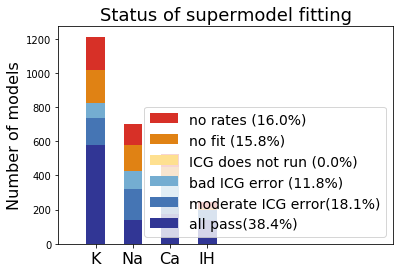

In [9]:
# make histogram with specs for each ion type

plt.figure()

n_good_fits = 0
total_mods = 0

total_no_rates = 0
total_no_fit = 0
total_no_run = 0
total_bad_err = 0
total_mod_err = 0
total_good_err = 0

for i in range(len(iontypes)):
    print(i)
    data_dict = super_dict[iontypes[i]]
    n_files = len(data_dict.keys())
    no_rates = len([1 for x in data_dict.keys() if not data_dict[x]['RATES']])
    no_fit = len([1 for x in data_dict.keys() if (data_dict[x]['RATES'] and not data_dict[x][sm_str+'_FIT'])])
    no_run = len([1 for x in data_dict.keys() if ((data_dict[x]['RATES'] and data_dict[x][sm_str+'_FIT']) and (not data_dict[x]['ICG_ORIG'] or not data_dict[x]['ICG_'+sm_str]))])
    works_errors = np.array([data_dict[x]['ICG_'+sm_str+'_ERROR'+str(ERR_NUM)]['total'] for x in data_dict.keys()
                             if (data_dict[x]['RATES'] and data_dict[x][sm_str+'_FIT'] 
                                 and data_dict[x]['ICG_'+sm_str] and data_dict[x]['ICG_ORIG'])])
    total_icg_errors = works_errors
    good_errors = len(total_icg_errors[total_icg_errors<0.1])
    moderate_errors = len(total_icg_errors[total_icg_errors<1.0]) - good_errors
    bad_errors = len(total_icg_errors) - moderate_errors - good_errors

    print('Ion type: ',iontypes[i])
    print('Number of files: ',n_files)
    print('Files with no rates: ',no_rates)
    print('Files with rates: ', n_files-no_rates)
    print('Files with no fit: ', no_fit)
    print('Files with rates and fits: ', n_files-no_rates-no_fit)
    print('Files that do not run ICG: ',no_run)
    print('Files with everything working: ',len(works_errors))
    print('Files with something not working: ', n_files-len(works_errors))
    print('Files with good error: ', good_errors)
    print('Files with moderate error: ', moderate_errors)
    print('Files with bad error: ', bad_errors)
    
    total_no_rates += no_rates
    total_no_fit += no_fit
    total_no_run += no_run
    total_bad_err += bad_errors
    total_mod_err += moderate_errors
    total_good_err += good_errors
    total_mods += n_files

    plt.bar(i,no_rates,0.5,good_errors+moderate_errors+bad_errors+no_fit+no_run,color='#d73027')
    plt.bar(i,no_fit,0.5,good_errors+moderate_errors+bad_errors+no_run,color='#e08214')
    plt.bar(i,no_run,0.5,good_errors+moderate_errors+bad_errors,color='#fee090')
    plt.bar(i,bad_errors,0.5,good_errors+moderate_errors,color='#74add1')
    plt.bar(i,moderate_errors,0.5,good_errors,color='#4575b4')
    plt.bar(i,good_errors,0.5,0.0,color='#313695')

plt.legend(('no rates ({0:.1f}%)'.format(100.0*total_no_rates/total_mods),
            'no fit ({0:.1f}%)'.format(100.0*total_no_fit/total_mods),
            'ICG does not run ({0:.1f}%)'.format(100.0*total_no_run/total_mods),
            'bad ICG error ({0:.1f}%)'.format(100.0*total_bad_err/total_mods),
            'moderate ICG error({0:.1f}%)'.format(100.0*total_mod_err/total_mods),
            'all pass({0:.1f}%)'.format(100.0*total_good_err/total_mods)),fontsize=14,loc=4)
plt.title('Status of supermodel fitting',fontsize=18)
plt.xticks(range(len(iontypes)),iontypes,fontsize=16)
plt.ylabel('Number of models',fontsize=16)
plt.xlim([-1,8])
plt.savefig("supermodel_status.pdf")

print("\nPercent of good fit models: ",100.0*n_good_fits/total_mods)

In [10]:
total_mods


2682

In [ ]:
100-16